<a href="https://colab.research.google.com/github/gsingla21/Machine_Learning/blob/main/Regularization%20-Ridge%20%26%20LASSO%20Regularization/ML_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q1

For implementation of Ridge Regressio using
least square error fit we will generate a dataset
with highly correlated values.

We have simulated a sine curve (between 60°
and 300°) and added some random noise.

using polynomial regression with powers of x
from 1 to 15.

Let’s add a column for each power upto 15 in our
dataframe.

Since the data is generated by ourself, so there is
no missing value . Noise is handled by
regularization only. So, step two is not required.

In [ ]:
import numpy as np
import pandas as pd
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10) #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
df= pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
for i in range(2,16): #power of 1 is already there
  colname = 'x_%d'%i #new var will be x_power
  df[colname] = df['x']**i
print(df)

           x         y        x_2  ...          x_13          x_14          x_15
0   1.047198  1.065763   1.096623  ...  1.821260e+00  1.907219e+00  1.997235e+00
1   1.117011  1.006086   1.247713  ...  4.214494e+00  4.707635e+00  5.258479e+00
2   1.186824  0.695374   1.408551  ...  9.268760e+00  1.100039e+01  1.305552e+01
3   1.256637  0.949799   1.579137  ...  1.948625e+01  2.448714e+01  3.077145e+01
4   1.326450  1.063496   1.759470  ...  3.935342e+01  5.220035e+01  6.924117e+01
5   1.396263  0.876795   1.949551  ...  7.666120e+01  1.070392e+02  1.494550e+02
6   1.466077  1.034349   2.149381  ...  1.445561e+02  2.119303e+02  3.107061e+02
7   1.535890  1.015673   2.358957  ...  2.646553e+02  4.064813e+02  6.243104e+02
8   1.605703  1.000035   2.578282  ...  4.716801e+02  7.573781e+02  1.216124e+03
9   1.675516  0.968332   2.807354  ...  8.202227e+02  1.374296e+03  2.302656e+03
10  1.745329  1.049762   3.046174  ...  1.394459e+03  2.433790e+03  4.247765e+03
11  1.815142  1.150751   3.2

Split Input & Output
Features

In [ ]:
X=df.drop(['y'],axis=1)
Y=df.iloc[:,1]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)

Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

Finding Regression
Coefficients

learning rate= 0.0001,0.001,0.01,0.1,1,10
regularization parameter=10e-15,10e-10,10e-5,10e-3,0,1,10,20

In [ ]:
lr=[0.0001,0.001,0.01,0.1,1,10]
rp=[10e-15,10e-10,10e-5,10e-3,0,1,10,20]
I=np.identity(16)
R2=[]
for lambda_1 in rp:
  A=X_train.T.dot(X_train)
  B=A+lambda_1*I
  C=np.linalg.inv(B)
  D=C.dot(X_train.T)
  beta=D.dot(Y_train)
  Y_predict=X_test.dot(beta)
  error=Y_test-Y_predict
  square_error=np.power(error,2)
  sum_square_error=np.sum(square_error)
  y_mean=np.mean(Y_test)
  total_variance=np.sum((Y_test-y_mean)**2)
  R2.append(1-sum_square_error/total_variance)
print(R2)

[0.9223865360603639, 0.9839275420529674, 0.9864879137150808, 0.9885640107272731, -5.226045670691364, 0.9786583529754278, 0.9626828290574647, 0.9352075593290384]


In [ ]:
R2.index(max(R2))  #get the index of max value of R2 to get best regularization parameter 

3

In [ ]:
lr[3] #parameters for which ridge regression cost function is minimum and R2_score is maximum.

0.1

#Q2

In [ ]:
#load the dataset
import pandas as pd
url='/content/drive/MyDrive/ML assignments/Assignment 5/Dataset/Hitters.csv'
dataset=pd.read_csv(url)

In [ ]:
dataset

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

**Handling null values**

In [ ]:
dataset.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [ ]:
len(dataset)

322

In [ ]:
dataset=dataset.fillna(dataset.mean())

In [ ]:
dataset.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

**Categorical to numerical encoding**

In [ ]:
dataset['League'].value_counts()

A    175
N    147
Name: League, dtype: int64

In [ ]:
cleanup_nums = {"League":{"A": 0, "N": 1}}
dataset=dataset.replace(cleanup_nums)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    int64  
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
dataset['Division'].value_counts()

W    165
E    157
Name: Division, dtype: int64

In [ ]:
cleanup_nums = {"Division":{"W": 0, "E": 1}}
dataset=dataset.replace(cleanup_nums)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    int64  
 14  Division   322 non-null    int64  
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
dataset['NewLeague'].value_counts()

A    176
N    146
Name: NewLeague, dtype: int64

In [ ]:
cleanup_nums = {"NewLeague":{"A": 0, "N": 1}}
dataset=dataset.replace(cleanup_nums)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    int64  
 14  Division   322 non-null    int64  
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    float64
 19  NewLeague  322 non-null    int64  
dtypes: float64

**Check Noise**

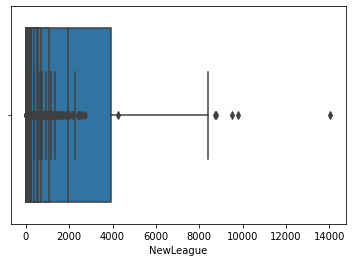

In [ ]:
import seaborn as sns
for i in dataset.columns:
  sns.boxplot(x=dataset[i])

Remove the noise

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
for i in dataset.columns:
  dataset[i]=scaler.fit_transform(dataset[i].values.reshape(-1, 1)).flatten()

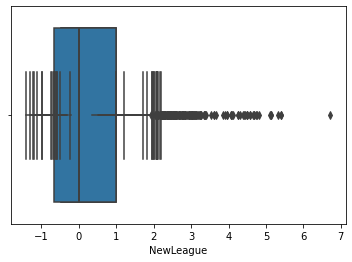

In [ ]:
import seaborn as sns
for i in dataset.columns:
  sns.boxplot(x=dataset[i])

Most of the noise has been handled

**Separate input and output features and perform scaling**

In [ ]:
X=dataset.iloc[:,dataset.columns!='Salary'].values
X.shape

(322, 19)

In [ ]:
y=dataset.iloc[:,dataset.columns=='Salary']
y.shape

(322, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)

**Fit a Linear, Ridge (use regularization parameter as 0.5748),**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn import metrics
ridge=Ridge(alpha=0.5748, normalize=True)
model=ridge.fit(X_train,y_train)

In [ ]:
ridge.coef_

array([[ 0.        ,  0.01600462,  0.06953127,  0.02690665,  0.03835216,
         0.02637163,  0.06281607,  0.00185183,  0.04727099,  0.07072651,
         0.05341187,  0.06225577,  0.07309777,  0.01671923, -0.00195302,
         0.05176972,  0.09146872, -0.02860826, -0.0195311 , -0.00385983]])

Check performance of ridge regression

In [ ]:
y_predict=model.predict(X_test)
print(metrics.r2_score(y_test,y_predict))

0.2816630548348805


**Fit a Linear, LASSO regression(use
regularization parameter as 0.5748)**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn import metrics
lasso=Lasso(alpha=0.5748, normalize=True)
model=lasso.fit(X_train,y_train)

In [ ]:
#All of the coefficients has been set to zero and most/all of the information is lost.
lasso.coef_

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0., -0.,  0., -0.])

Check performance of LASSO regression

In [ ]:
y_predict=model.predict(X_test)
print(metrics.r2_score(y_test,y_predict))

-0.021611201385137502


Here Ridge regression is working better than LASSO regression because lasso is setting all coefficients to zero.

Lasso tends to do well if there are a small number of significant parameters and the others are close to zero (ergo: when only a few predictors actually influence the response). 

Ridge works well if there are many large parameters of about the same value (ergo: when most predictors impact the response)

#Q3

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [ ]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
dataset['MEDV'] = boston_dataset.target

In [ ]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

**Pre-processing**

In [ ]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
X=dataset.iloc[:,:-1].values
X.shape

(506, 13)

In [ ]:
y=dataset.iloc[:,-1].values.reshape(-1,1)
y.shape

(506, 1)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354, 1)
Shape of y_test (152, 1)


**Regression Models**

We'll generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Instead of arbitrarily choosing regularization parameter=0.5748 , it would be better to use cross-validation to choose the tuning parameter alpha. We can do this using the cross-validated ridge regression function, RidgeCV(). By default, the function performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the argument cv.

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=alphas, cv=10, normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [ ]:
ridgecv.alpha_

0.020185086292982747

Therefore, we see that the value of alpha that results in the smallest cross-validation error is 0.02018. 

What is the test R2_score associated with this value of alpha?

In [ ]:
from sklearn.metrics import mean_squared_error
ridge=Ridge(alpha=ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)
y_predict=ridge.predict(X_test)
error=y_test-y_predict
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
y_mean=np.mean(y_test)
total_variance=np.sum((y_test-y_mean)**2)
print(1-sum_square_error/total_variance)

0.7165069748903357


In [ ]:
ridge

Ridge(alpha=0.020185086292982747, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=True, random_state=None, solver='auto',
      tol=0.001)

Lasso Cross Validation (LassoCV)

In [ ]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(alphas = alphas, cv = 10, normalize = True)
lassocv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [ ]:
lassocv.alpha_

0.005

In [ ]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
y_predict=lasso.predict(X_test)
error=y_test-y_predict
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
y_mean=np.mean(y_test)
total_variance=np.sum((y_test-y_mean)**2)
print(1-sum_square_error/total_variance)

-246.6156025242935


In [ ]:
lasso

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_)

0     -0.085676
1      0.038239
2     -0.000000
3      0.460716
4    -16.042281
5      4.238455
6     -0.000000
7     -1.278491
8      0.181810
9     -0.008010
10    -0.924813
11     0.006859
12    -0.459181
dtype: float64